## Clipping

Often times we want to clip out LiDAR points using a shapefile. This can be done using pyfor's `Cloud.clip` method. pyfor integrates with geopandas and shapely, convenient geospatial packages for Python, to provide a way to clip point clouds. 

In [2]:
import pyfor
import geopandas as gpd

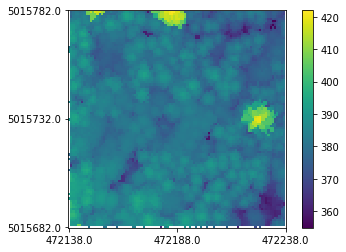

In [3]:
# Load the point cloud and plot.
pc = pyfor.cloud.Cloud("../pyfortest/data/test.las")
pc.plot()

Our clipping function requires a shapely `Polygon` as input. We can retrieve this information easily with geopandas.

In [4]:
# Load our clippping geometry
poly_frame = gpd.read_file("/home/bryce/Desktop/two_features.shp")
poly_frame

,id,geometry
0,1,"POLYGON ((472170.3178745913 5015737.066828337,..."
1,2,"POLYGON ((472176.4908620771 5015734.157825706,..."


As we can see, `clip.shp` contains just two `Polygons`. We can access them like so:

In [9]:
# Access the specific polygon to clip
polygon = poly_frame["geometry"].iloc[0]

# Print out the object type
[type(polygon) for polygon in poly_frame["geometry"]]

[shapely.geometry.polygon.Polygon, shapely.geometry.polygon.Polygon]

Great, we now have access to the datatype that `Cloud.clip` requires, a `shapely Polygon`. This is a very frequently used data type in vector analysis with GIS data in Python. We can proceed with clipping our point cloud.

/home/bryce/miniconda3/envs/pyfor_env/lib/python3.6/site-packages/pyfor/rasterizer.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/bryce/miniconda3/envs/pyfor_env/lib/python3.6/site-packages/pyfor/rasterizer.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



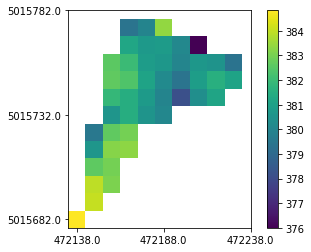

/home/bryce/miniconda3/envs/pyfor_env/lib/python3.6/site-packages/pyfor/rasterizer.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/bryce/miniconda3/envs/pyfor_env/lib/python3.6/site-packages/pyfor/rasterizer.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



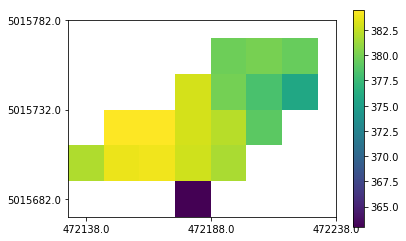

[None, None]

In [13]:
# Clip and plot
[pc.clip(polygon).plot() for polygon in poly_frame["geometry"]]